# 1. Load data and visualize

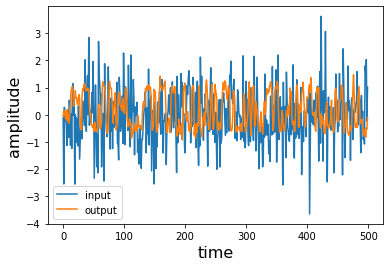

In [1]:
%matplotlib inline
import numpy as np
from scipy.io import loadmat

import matplotlib.pyplot as plt

filename = "C:/Users/doyle/Downloads/assignment1Data.mat"

matfile = loadmat(filename)

s = matfile['s']
o = matfile['o']

signal_length = s.shape[0]

time = range(signal_length)

plt.plot(time, s, label='input')
plt.plot(time, o, label='output')
plt.legend()
plt.xlabel('time', fontsize=16)
plt.ylabel('amplitude', fontsize=16)
plt.show()

# 2. Create design matrix 

In [2]:
window_size = 50

number_of_windows = signal_length - window_size - 1

A = np.zeros((window_size + 1, number_of_windows))
O = np.zeros((1, number_of_windows))

print('Size of A:', A.shape)
print('Size of O:', O.shape)
print(s.shape)

for i in range(number_of_windows):
    A[0:window_size, i] = s[i:i+window_size, 0]
    A[-1, i] = 1
    O[0, i] = o[i, 0]

Size of A: (51, 449)
Size of O: (1, 449)
(500, 1)


# 3. Estimate impulse response

(51, 449) (1, 449)
dc offset: [0.20836781]


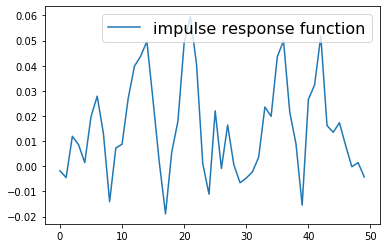

In [3]:
from numpy.linalg import inv
from numpy.linalg import lstsq

# max_size = np.min(A.shape[0:2])
# print(A.shape, O.shape)

# A = A[0:max_size, 0:max_size]
# O = O[0:max_size]

# print(A.shape, O.shape)

# A_inv = inv(A)

# f = np.matmul(A_inv, O)

print(A.shape, O.shape)

f, res, rank, _ = lstsq(np.transpose(A), np.transpose(O), rcond=None)
k = f[-1]

print('dc offset:', k)

irf = f[:-1][::-1]

plt.plot(irf, label='impulse response function')
plt.legend(fontsize=16)
plt.show()

# 4. Plot linear system for input

(449, 1)
(500, 1)


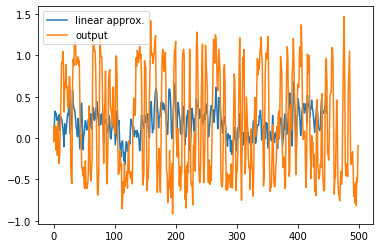

In [4]:
number_of_windows = signal_length - window_size - 1
linear_system_output = []

for i in range(number_of_windows):
    t = i + window_size
    s_input = s[t-window_size:t, 0]
    
    linear_system_output.append(np.dot(s_input, irf) + k)
    
print(np.asarray(linear_system_output).shape)
print(o.shape)

plt.plot(linear_system_output, label='linear approx.')
plt.plot(o[:, 0], label='output')
# plt.plot(o[:, 0] - output, label='error')
plt.legend()
plt.show()